# **Workshop 10: Feature Extraction**
**คำสั่ง**

1.   ศึกษาวิธีการสกัดคุณลักษณะสำหรับข้อมูลรูปภาพต่อไปนี้
2.   ทำโจทย์ปฏิบัติการแต่ละข้อตามคำสั่ง
3.   ตั้งชื่อไฟล์ python notebook นี้ในรูปแบบ Lab_10_XXXXXXXXX.ipynb โดย XXXXXXXXX คือ รหัสนักศึกษา
4.   ทำการดาวน์โหลดและส่งไฟล์ Lab_10_650510714.ipynb ที่เว็บไซต์ https://mango-cmu.instructure.com/courses/6152/assignments/61248

In [ ]:
import pandas as pd
import numpy as np
import cv2

In [ ]:
from skimage import feature
import zipfile
import glob
import os

from google.colab.patches import cv2_imshow

**Read an image and tramsform to gray image**

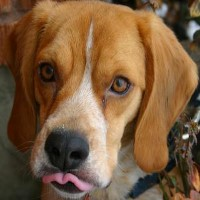

In [ ]:
imgRGB = cv2.imread("n02088364_161.jpg")
cv2_imshow(imgRGB)

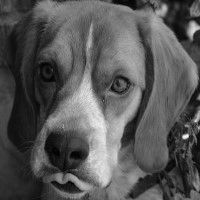

In [ ]:
imgGray = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)
cv2_imshow(imgGray)

**Resize the image**

(200, 200)
(100, 100)


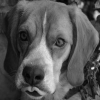

In [ ]:
print(imgGray.shape)
imgGray = cv2.resize(imgGray, (100,100))
print(imgGray.shape)
cv2_imshow(imgGray)

**HOG feature**

In [ ]:
# เทคนิค Histogram of Oriented Gradients (HOG)
x_hog = feature.hog(imgGray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm="L1")
print(x_hog.shape)

(4356,)


**LBP feature**

In [ ]:
# Calculate LBP array of Grayscale image
p = 8 # จำนวน Point
r = 1 # จำนวน Radius
lbp = feature.local_binary_pattern(imgGray, p, r, method="uniform")
(x_lbp,_) = np.histogram(lbp.ravel(), bins=np.arange(0, p + 3), range=(0, p + 2))

In [ ]:
lbp.shape

(100, 100)

ปฏิบัติการข้อ 1) จงเขียนฟังก์ชันสำหรับสกัด LBP feature สำหรับภาพ 1 ภาพ โดยมีขั้นตอนการทำงาน ดังนี้

1.   แบ่งรูปต้นฉบับออกเป็น block ขนาด nxn จุดภาพ ที่ไม่มีส่วนทับซ้อนกัน
2.   ทำการสร้าง Histogram ของ LBP ของแต่ละ block
3.   ทำการเชื่อม Histogram ของ LBP ของแต่ละ block เข้าด้วยกันเป็น feature vector
4.   ส่ง feature vector ที่สร้างได้กลับเป็น output ของฟังก์ชัน

In [ ]:
def extractLBPFeature(img, n):
  # your code here!
    # Convert the image to Grayscale
    #imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    imgGray = cv2.resize(img, (100,100))
    block_size = 25
    num_blocks = 100 // block_size

    # Initialize a list to store the histograms of each block
    histograms = []

    # Iterate over blocks
    for i in range(num_blocks):
        for j in range(num_blocks):
            # Extract the block from the image
            block = imgGray[i * block_size:(i + 1) * block_size, j * block_size:(j + 1) * block_size]
            # Calculate LBP for the block
            lbp = feature.local_binary_pattern(block, n, 2, method="uniform")
            (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n + 3), range=(0, n + 2))
            # Normalize the histogram
            hist = hist.astype("float")
            hist /= (hist.sum() + 1e-7)
            histograms.append(hist)
    # Concatenate all block histograms into a single feature vector
    feature_vector = np.concatenate(histograms)

    return feature_vector

In [ ]:
extractLBPFeature(imgGray, 8)

array([0.0576, 0.1088, 0.1328, 0.1632, 0.1232, 0.1232, 0.0592, 0.0672,
       0.0432, 0.1216, 0.0768, 0.096 , 0.0848, 0.1136, 0.2048, 0.136 ,
       0.048 , 0.0512, 0.0352, 0.1536, 0.056 , 0.1104, 0.096 , 0.1168,
       0.24  , 0.128 , 0.0736, 0.0336, 0.0336, 0.112 , 0.072 , 0.1088,
       0.0928, 0.1408, 0.1664, 0.1232, 0.0608, 0.0592, 0.04  , 0.136 ,
       0.0784, 0.1424, 0.0736, 0.1008, 0.1536, 0.1008, 0.0368, 0.0656,
       0.0688, 0.1792, 0.064 , 0.1072, 0.1328, 0.1232, 0.2192, 0.1024,
       0.0368, 0.0608, 0.04  , 0.1136, 0.0416, 0.0944, 0.1056, 0.2176,
       0.1888, 0.1264, 0.0288, 0.032 , 0.0464, 0.1184, 0.0768, 0.1168,
       0.0672, 0.0912, 0.2128, 0.1008, 0.0496, 0.0496, 0.0512, 0.184 ,
       0.0848, 0.1056, 0.0832, 0.08  , 0.2064, 0.096 , 0.048 , 0.0688,
       0.0688, 0.1584, 0.0624, 0.0592, 0.0816, 0.1776, 0.2512, 0.168 ,
       0.0528, 0.0288, 0.0112, 0.1072, 0.08  , 0.1152, 0.0912, 0.1008,
       0.2128, 0.1008, 0.0368, 0.0512, 0.048 , 0.1632, 0.1072, 0.0928,
      

**Dealing with multiple files**

In [ ]:
zip = zipfile.ZipFile('dog_img.zip')
zip.extractall()

dog_img/n02088364_427.jpg


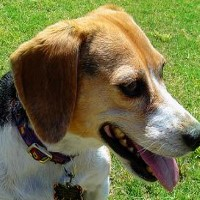

dog_img/n02088364_1384.jpg


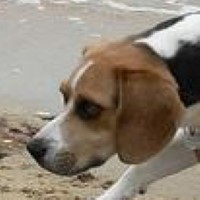

dog_img/n02088364_129.jpg


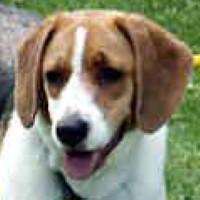

dog_img/n02088364_1507.jpg


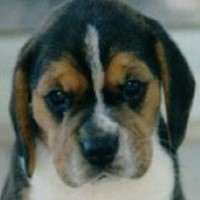

dog_img/n02088364_959.jpg


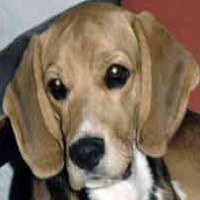

dog_img/n02088364_639.jpg


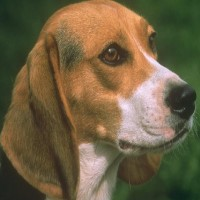

dog_img/n02088364_852.jpg


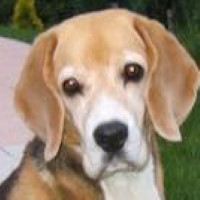

dog_img/n02088364_2000.jpg


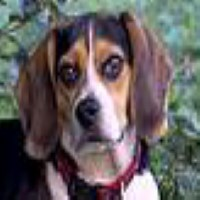

dog_img/n02088364_769.jpg


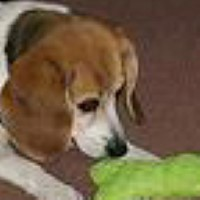

dog_img/n02088364_161.jpg


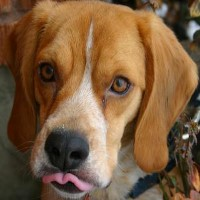

dog_img/n02088364_876.jpg


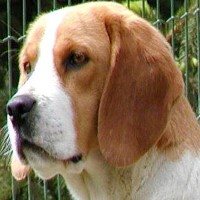

dog_img/n02088364_1128.jpg


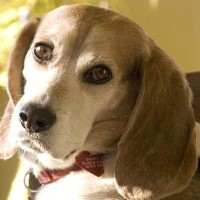

In [ ]:
for imgFile in glob.glob(os.path.join('dog_img','*.jpg')):
    print(imgFile)
    tmp_img = cv2.imread(imgFile)
    cv2_imshow(tmp_img)

ปฏิบัติการข้อ 2) สกัดคุณลักษณะของภาพแต่ละภาพในโฟลเดอร์ dog_img แยกเป็น HOG และ LBP Feature (เรียกใช้ฟังก์ชันในข้อ 1) โดยแต่ละแถวเก็บ Feature ของแต่ละภาพ

In [ ]:
# your code here!
HOG_feature = []
LBP_feature = []

# Feature Extraction on each image one by one
for imgFile in glob.glob(os.path.join('dog_img','*.jpg')):
    tmp_img = cv2.imread(imgFile)
    tmp_img = cv2.cvtColor(tmp_img, cv2.COLOR_RGB2GRAY)
    tmp_img = cv2.resize(tmp_img, (100,100))

    # Histogram of Oriented Gradients (HOG)
    x_hog = feature.hog(tmp_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm="L1")
    HOG_feature.append(x_hog)

    # Local Binary Patterns (LBP)
    x_lbp = extractLBPFeature(tmp_img, 8)
    LBP_feature.append(x_lbp)

# Convert the Feature Vector to an array
HOG_feature = np.array(HOG_feature)
LBP_feature = np.array(LBP_feature)

In [ ]:
HOG_feature

array([[0.04080655, 0.01791538, 0.03498311, ..., 0.02065897, 0.02397292,
        0.05634105],
       [0.05670455, 0.02555339, 0.02611496, ..., 0.00702909, 0.01190243,
        0.        ],
       [0.02974844, 0.00711736, 0.02101803, ..., 0.02849804, 0.01217933,
        0.03700674],
       ...,
       [0.03568683, 0.03336693, 0.02679988, ..., 0.02577532, 0.07134366,
        0.07334901],
       [0.06559698, 0.00859623, 0.00277352, ..., 0.02289775, 0.02191279,
        0.01566327],
       [0.00804419, 0.00043945, 0.02547483, ..., 0.01338306, 0.01609992,
        0.02292943]])

In [ ]:
HOG_feature.shape

(12, 4356)

In [ ]:
LBP_feature

array([[0.1392, 0.128 , 0.0608, ..., 0.088 , 0.0608, 0.2448],
       [0.104 , 0.1232, 0.0544, ..., 0.0704, 0.0624, 0.208 ],
       [0.1056, 0.0944, 0.088 , ..., 0.0672, 0.0528, 0.1792],
       ...,
       [0.0576, 0.1088, 0.1328, ..., 0.0704, 0.0736, 0.2016],
       [0.072 , 0.1152, 0.0592, ..., 0.0432, 0.04  , 0.16  ],
       [0.0736, 0.08  , 0.0912, ..., 0.0704, 0.0656, 0.2208]])

In [ ]:
LBP_feature.shape

(12, 160)